In [25]:
import pandas as pd #to read the dataset
import numpy as np #operations with the array
import os #handle files
import matplotlib.pyplot as plt #plot graphs
import seaborn as sns

In [26]:
df=pd.read_csv('iris.data.csv',names=['sepalLengthCm','sepalWidthCm','petalLengthCm','petalWidthCm','Species'])

In [27]:
#display first 5 rows of the data set
df.head()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
#to display stats about data
df.describe()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [29]:
#display basic info about the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepalLengthCm  150 non-null    float64
 1   sepalWidthCm   150 non-null    float64
 2   petalLengthCm  150 non-null    float64
 3   petalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
#to display number of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [31]:
 #check for null values
df.isnull().sum()

sepalLengthCm    0
sepalWidthCm     0
petalLengthCm    0
petalWidthCm     0
Species          0
dtype: int64

<Axes: >

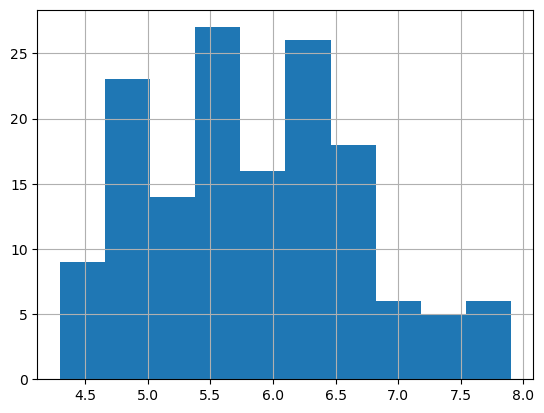

In [32]:
df['sepalLengthCm'].hist()

array([[<Axes: title={'center': 'sepalLengthCm'}>,
        <Axes: title={'center': 'sepalWidthCm'}>],
       [<Axes: title={'center': 'petalLengthCm'}>,
        <Axes: title={'center': 'petalWidthCm'}>]], dtype=object)

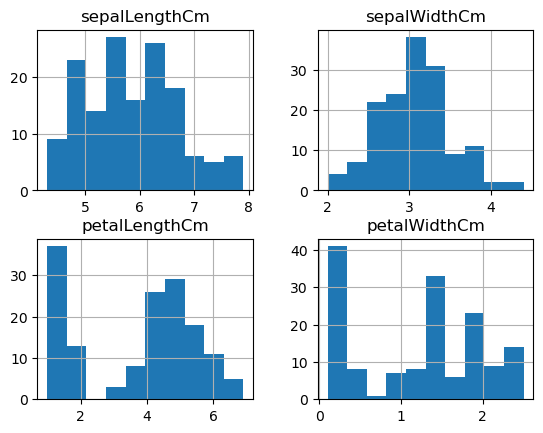

In [33]:
df.hist()

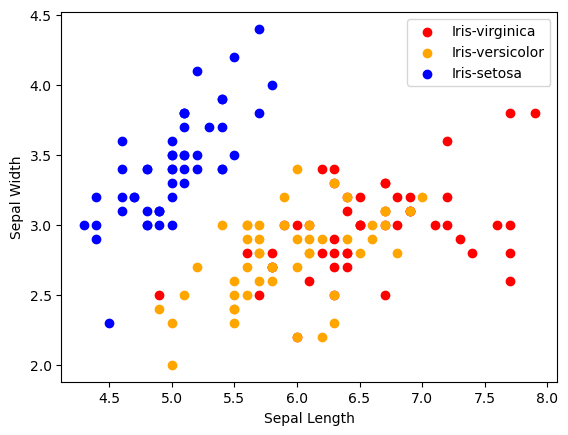

In [34]:
#scatter plots
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['sepalLengthCm'],x['sepalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

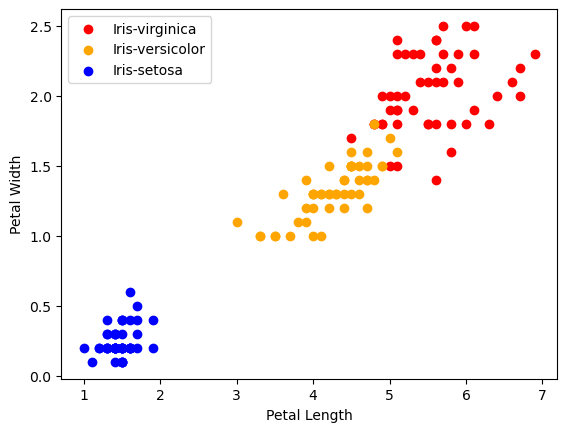

In [35]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['petalLengthCm'],x['petalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

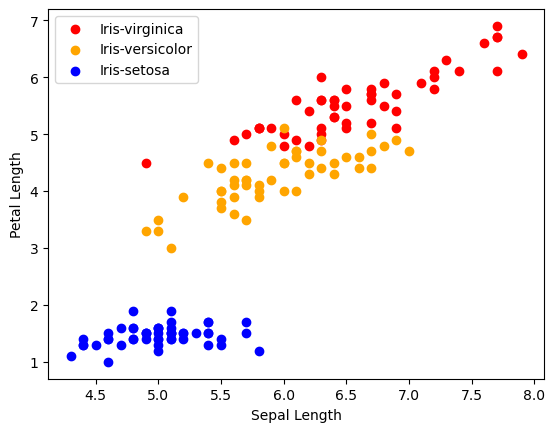

In [36]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['sepalLengthCm'],x['petalLengthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

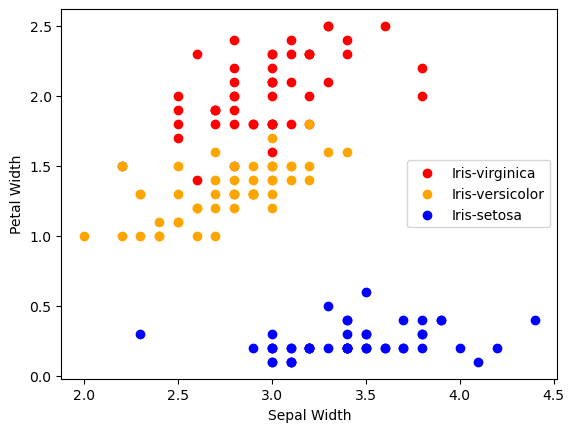

In [37]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['sepalWidthCm'],x['petalWidthCm'],c=colors[i],label=species[i])
    plt.xlabel("Sepal Width")
    plt.ylabel("Petal Width")
    plt.legend()

In [38]:
df.corr(numeric_only=True)

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm
sepalLengthCm,1.000000,-0.109369,0.871754,0.817954
sepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
petalLengthCm,0.871754,-0.420516,1.000000,0.962757
petalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

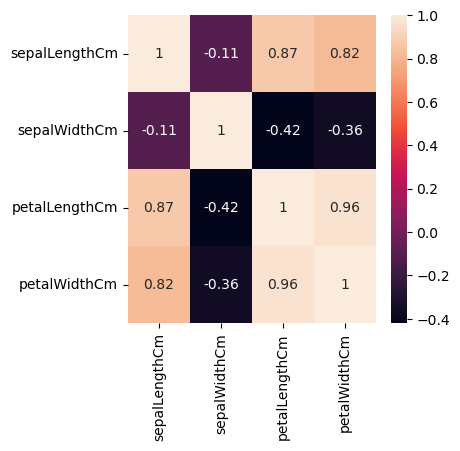

In [39]:
corr=df.corr(numeric_only=True)
fig,ax=plt.subplots(figsize=(4,4))
sns.heatmap(corr,annot=True,ax=ax)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,sepalLengthCm,sepalWidthCm,petalLengthCm,petalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
from sklearn.model_selection import train_test_split
#train-70
#test-30
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

In [43]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
#model training
model.fit(x_train,y_train)

LogisticRegression()

In [44]:
#print metric to get performance
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [45]:
#knn-k-nearest neightbors
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [46]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [47]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  93.33333333333333
